**IMPORT LIBRARY**

In [23]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn import neighbors
from termcolor import colored
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm

**Mengambil File Data nya**

In [5]:
file_data = pd.read_table('fruit_data.txt')  # File data jenis buah

**Menampilkan 10 data dari tabel**

In [6]:
print(file_data.shape)
file_data.head(10)

(59, 7)


,buah_label,buah_nama,fruit_subtype,massa,lebar,tinggi,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


**Membuat key pair (fruit_label dan fruit_name)**

In [7]:
key_pair = dict(zip(file_data.buah_label.unique(), file_data.buah_nama.unique()))   
print(key_pair)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


**Split, Build and Train Data Jenis Buah**

In [8]:
#explanatorynya adalah massa, lebar dan tinggi.
#Targetnya adalah fruit_label.

X = file_data[['massa', 'lebar', 'tinggi']]
y = file_data['buah_label']

In [9]:
#Split menjadi 80% train data
#Split menjadi 20% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

**Check Hasil Setelah Di Split**

In [10]:
#Mengecek X_train, X_test, y_train, y_test kedalam bentuk dimensi array
print('X_train = ', X_train.shape)
print('X_test  = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test  = ', y_test.shape)

X_train =  (47, 3)
X_test  =  (12, 3)
y_train =  (47,)
y_test  =  (12,)


In [11]:
#Menampilkannya dalam bentuk tabel

print('Data X_train\n')
X_train.head()

Data X_train



,massa,lebar,tinggi
30,158,7.1,7.5
41,180,7.6,8.2
33,190,7.5,8.1
42,154,7.2,7.2
48,174,7.3,10.1


In [12]:
print('\nData y_train\n')
y_train.head()


Data y_train



30    3
41    3
33    3
42    3
48    4
Name: buah_label, dtype: int64

In [13]:
print('\nData X_test\n')
X_test.head()


Data X_test



,massa,lebar,tinggi
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [14]:
print('\nData y_test\n')
y_test.head()


Data y_test



26    3
35    3
43    4
28    3
11    1
Name: buah_label, dtype: int64

In [15]:
#Build model object dan train data jenis buah dengan memprediksi jarak dari 5 titik terdekat menggunakan data training

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Mengecek besar akurasi skor menggunakan Data test**

In [16]:
knn.score(X_test, y_test)

0.5833333333333334

**Plot batas pengklasifikasi K-NN (Visualisasi)**

In [17]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['tinggi', 'lebar']].to_numpy()
    y_mat = y.to_numpy()

    # Pewarnaan Map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#F37A48', '#F7C015','#FAFA33'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = .01  # Ukurang langkah
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Meletakkan hasil kedalam warna plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training poin
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='Buah Apple')
    patch1 = mpatches.Patch(color='#F37A48', label='Buah Mandarin')
    patch2 = mpatches.Patch(color='#F7C015', label='Buah Orange')
    patch3 = mpatches.Patch(color='#FAFA33', label='Buah Lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('Tinggi (cm)')
    plt.ylabel('Lebar (cm)')
    
    plt.show()

<IPython.core.display.Javascript object>


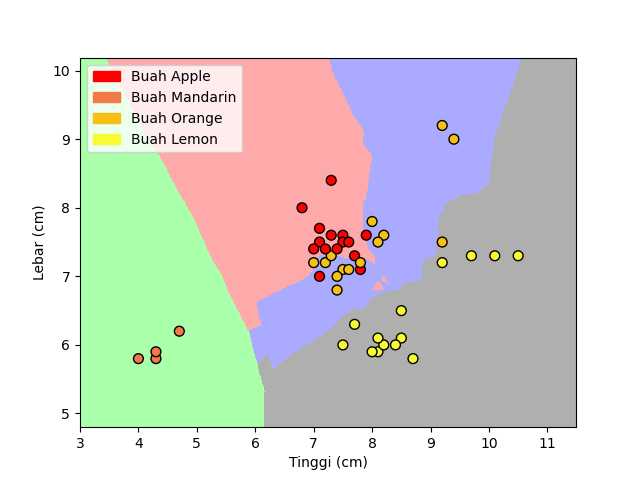

In [18]:
#Plot berdasarkan height dan weight
# n_neighbors = 5 / Jarak titik terdekat | menggunakan matplotlib
plot_fruit_knn(X_train, y_train, 5, 'uniform')  

**TESTING DATA**

In [27]:
# prediksi jenis buah  dengan kunci itemnya -> massa Xgram, lebar Ycm and height Zcm
buah_prediksi = knn.predict([[160, 6, 8]])
print('Prediksi hasil jenis buah adalah ' + colored(key_pair[buah_prediksi[0]].upper(),'red',attrs=['bold']))

Prediksi hasil jenis buah adalah ORANGE
